<a href="https://colab.research.google.com/github/englishmuffins10/Homework/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Excercise 7.3 Page 317

a: Program loading and calculating Fourier transforms from piano.txt and trumpet.txt

Total number of entries =  100000


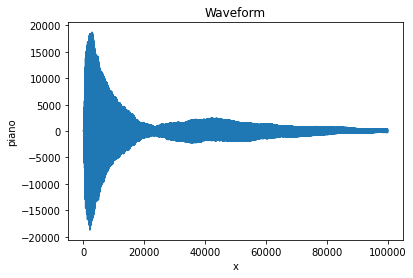

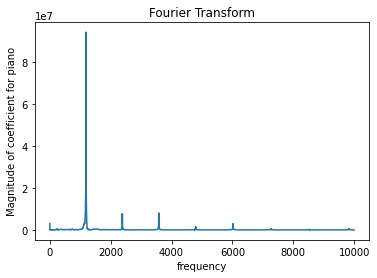

Total number of entries =  100000


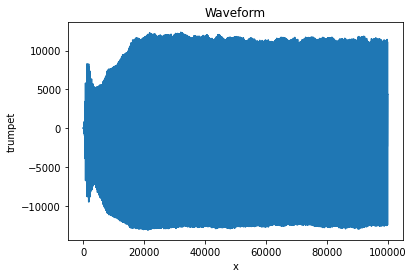

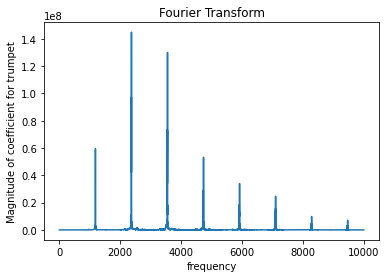

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive

# Function that plots a wave function and its fourier transform
# Takes the array of values and the type of file its from
# Returns nothing
# Code by Mark Newman, edited for the use of arrays instead of functions
# Limited to the first 10,000 values as per 7.3 suggests
def discreteft(yArr,type):
  N = len(yArr)
  x = np.arange(0,N,1)
  y = yArr
  c = np.fft.rfft(y)
  print("Total number of entries = ",N)
  plt.plot(x,y)
  plt.title("Waveform")
  plt.xlabel("x")
  plt.ylabel(type)
  plt.show()
  plt.plot(abs(c[:10000]))## plot abs value of coefficient
  plt.title("Fourier Transform")
  plt.xlabel("frequency")
  plt.ylabel("Magnitude of coefficient for " + type)
  plt.show()

#drive.mount('/content/drive')                        # Used only to mount my google drive
f = open('/content/drive/My Drive/piano.txt', 'r')    # Open the file containing the data
f1 = f.readlines()                                    # Get all lines from the file

pArr = np.zeros(len(f1))                              # Define a numpy array for piano.txt
count = 0
for v in f1:                                          # Add all of the values from the file to the array
  pArr[count] = v
  count += 1

f = open('/content/drive/My Drive/trumpet.txt', 'r')  # Open the file containing the data
f2 = f.readlines()                                    # Get all lines from the file

tArr = np.zeros(len(f2))                              # Define a numpy array for trumpet.txt
count = 0
for v in f2:                                          # Add all of the values from the file to the array
  tArr[count] = v
  count += 1

discreteft(pArr,"piano")                              # Get the discrete tranforms for the two arrays
discreteft(tArr,"trumpet")

Conclusion on results:

Going off of the first 10,000 values in the arrays it is clear that there are very discrete points on the Fourier Transform chart with frequencies seemingly equidistant from each other (~800). Both the piano and trumpet data give points at nearly the same location with the trumpet having a larger intensity with the points after the first. The piano has 5 main frequencies while the trumpet has 8, each sharing the seemingly exact first 5 frequencies but at different magnitudes. It seems, from the data, that the piano is better able to play one specific note having little interference from the other notes while the trumpet cant quite play only one particular frequency at a time.



b: The note based on 44100 samples per second:

Taking in 44,100 actual samples per second, a total of 100,000 points and going off of the quite prominent k for the piano at k=~1600 we get a frequency of: (44,100/100,000)*(1600) = ~706Hz, which is close to the note F5 at 698Hz compared to the note middle C (C4) at 261Hz



2) Excercise 7.4 Page 317

a: Read dow.txt data and plot it

Total number of entries =  1024


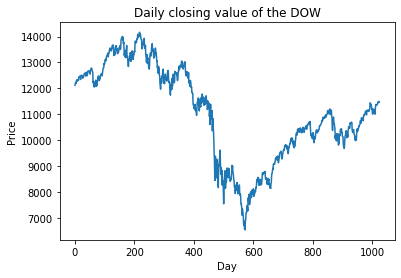

Total number of entries =  1024


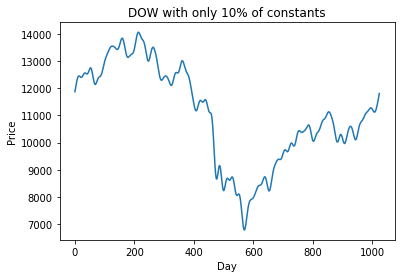

In [39]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive

f = open('/content/drive/My Drive/dow.txt', 'r')      # Open the file containing the data
f1 = f.readlines()                                    # Get all lines from the file

dArr = np.zeros(len(f1))                              # Define a numpy array
count = 0
for v in f1:                                          # Add all of the values from the file to the array
  dArr[count] = v
  count += 1

# Part A, plotting DOW data
N = len(dArr)
x = np.arange(0,N,1)
y = dArr
print("Total number of entries = ",N)
plt.plot(x,y)
plt.title("Daily closing value of the DOW")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()

# Part B, tranform to get coefficients
c = np.fft.rfft(dArr)

# Part C, setting last 90% of constants = 0
N = len(c)
c[round(N/10):N] = 0

# Part d, inverse transform, graph results
y = np.fft.irfft(c)
N = len(y)
x = np.arange(0,N,1)
print("Total number of entries = ",N)
plt.plot(x,y)
plt.title("DOW with only 10% of constants")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()


Conclusion:

Setting all of those constants to 0 seems to have removed a large amount of the random noise from the chart, smoothing out the plot but still keeping most of its shape.


e: Same as c but only the first 2% of elements arnt 0

Total number of entries =  1024


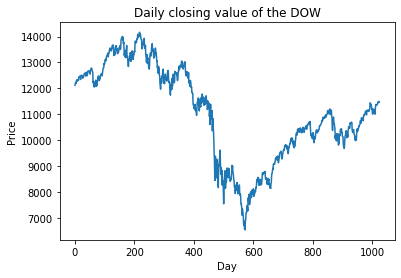

Total number of entries =  1024


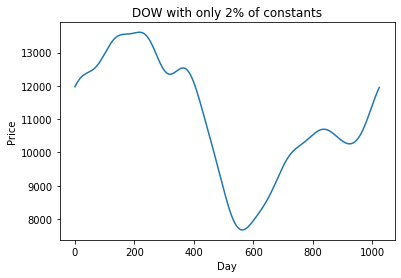

In [40]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive

f = open('/content/drive/My Drive/dow.txt', 'r')    # Open the file containing the data
f1 = f.readlines()                                  # Get all lines from the file

dArr = np.zeros(len(f1))                            # Define a numpy array
count = 0
for v in f1:                                        # Add all of the values from the file to the array
  dArr[count] = v
  count += 1

N = len(dArr)                                       # Showing original data
x = np.arange(0,N,1)
y = dArr
print("Total number of entries = ",N)
plt.plot(x,y)
plt.title("Daily closing value of the DOW")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()

c = np.fft.rfft(dArr)                               # Getting the Fourier Transform constants

N = len(c)                                          # Get only the first 2% of the constants
c[round(N/50):N] = 0

y = np.fft.irfft(c)                                 # Perfrom the inverse Fourier Tranform, plot results
N = len(y)
x = np.arange(0,N,1)
print("Total number of entries = ",N)
plt.plot(x,y)
plt.title("DOW with only 2% of constants")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()

3) Excercise 7.5 Page 318

Smoot out the square wave f(x) using Fourier transforms.

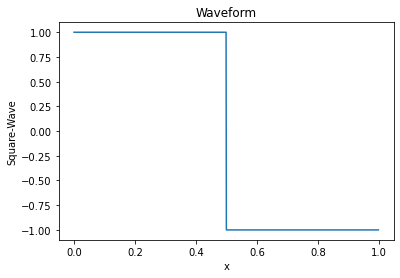

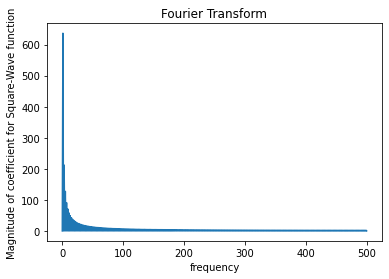

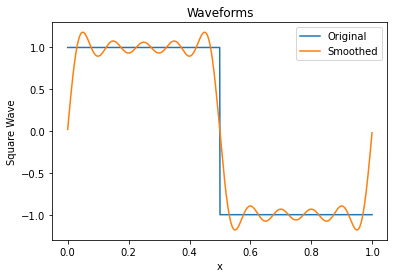

In [50]:
import numpy as np
from matplotlib import pyplot as plt
import math

# Square-wave function that returns a value of 1 or -1 given a value t
def f_square(t):
  val = math.floor(2*t)
  if (val % 2 == 0): return 1
  else: return -1

N = 1000
x = np.arange(0,1,1./N)
y = [f_square(x) for x in x]
c = np.fft.rfft(y)
plt.plot(x,y)
plt.title("Waveform")
plt.xlabel("x")
plt.ylabel("Square-Wave")
plt.show()
plt.plot(abs(c))
plt.title("Fourier Transform")
plt.xlabel("frequency")
plt.ylabel("Magnitude of coefficient for Square-Wave function")
plt.show()

N = len(c)
c[10:N] = 0

y2 = np.fft.irfft(c)
plt.plot(x,y, Label = "Original")
plt.plot(x,y2, Label = "Smoothed")
plt.legend(loc="upper right")
plt.title("Waveforms")
plt.xlabel("x")
plt.ylabel("Square Wave")
plt.show()

Conclusion:

The final smooth result holds artifacts, or wiggles over what would have originally been a smotth line at 1 and -1. This is because the sine waves necessary to generate these straight lines were removed when we went to smooth out the chart, leaving fluctuations in the values.



4) Excercise 7.6 Page 319

a: Program similar to 7.4 part e but for dow2.txt

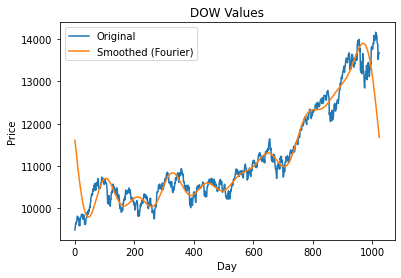

In [56]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive

f = open('/content/drive/My Drive/dow2.txt', 'r')   # Open the file containing the data
f1 = f.readlines()                                  # Get all lines from the file

dArr = np.zeros(len(f1))                            # Define a numpy array
count = 0
for v in f1:                                        # Add all of the values from the file to the array
  dArr[count] = v
  count += 1

N = len(dArr)                                       # Original Data
x = np.arange(0,N,1)
y = dArr

c = np.fft.rfft(dArr)                               # Getting the Fourier Transform constants

N = len(c)                                          # Get only the first 2% of the constants
c[round(N/50):N] = 0

y2 = np.fft.irfft(c)                                # Perfrom the inverse Fourier Tranform, plot results
plt.plot(x,y, Label = "Original")
plt.plot(x,y2, Label = "Smoothed (Fourier)")
plt.legend(loc="upper left")
plt.title("DOW Values")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()

b: Use discrete cosine transforms instead

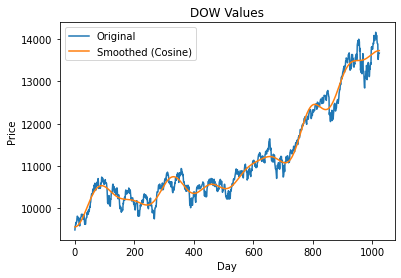

In [55]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
from numpy import empty,arange,exp,real,imag,pi
from numpy.fft import rfft,irfft

# Function that gets the cosine transform for the values y
# Takes an array of values
# Returns an array holding the transform constants
# Code from the book resources dcst.py
def dct(y):
    N = len(y)
    y2 = empty(2*N,float)
    y2[:N] = y[:]
    y2[N:] = y[::-1]

    c = rfft(y2)
    phi = exp(-1j*pi*arange(N)/(2*N))
    return real(phi*c[:N])

# Function that gets the inverse cosine transform for the array of constants a
# Takes an array of constants
# Returns an array holding the inversely tranformed values
# Code from the book resources dcst.py
def idct(a):
    N = len(a)
    c = empty(N+1,complex)

    phi = exp(1j*pi*arange(N)/(2*N))
    c[:N] = phi*a
    c[N] = 0.0
    return irfft(c)[:N]

f = open('/content/drive/My Drive/dow2.txt', 'r')   # Open the file containing the data
f1 = f.readlines()                                  # Get all lines from the file

dArr = np.zeros(len(f1))                            # Define a numpy array
count = 0
for v in f1:                                        # Add all of the values from the file to the array
  dArr[count] = v
  count += 1

N = len(dArr)                                       # Original Data
x = np.arange(0,N,1)
y = dArr

c = dct(dArr)                                       # Getting the Cosine Transform

N = len(c)                                          # Get only the first 2% of the constants
c[round(N/50):N] = 0

y2 = idct(c)                                        # Perfrom the inverse Cosine transform, plot results
plt.plot(x,y, Label = "Original")
plt.plot(x,y2, Label = "Smoothed (Cosine)")
plt.legend(loc="upper left")
plt.title("DOW Values")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()